### **Task at hand:** </br>
```
The marketing department of a company has been tracking fourteen different metrics on customers who inquired about their new life insurance product. The company are interested if the data can be used to predict if a new customer will buy the life insurance product.
```

| Field        | Values                           | Description                                                           |
|--------------|----------------------------------|-----------------------------------------------------------------------|
| flag         | Y, N                             | Y = The customer bought the product. N = The customer didn’t buy the product. |
| gender       | M, F                             | M = Male F = Female                                                  |
| education    | 0. <HS, 1.HS, 2.Some College, 3.Bach, 4.Grad | 0. <HS = Customer did not complete high school. 1.HS = Customer completed high school but did not attend college. 2.Some College = customer attended college but did not complete a full degree. 3.Bach = Customer completed a bachelor’s degree. 4.Grad = Customer completed some post graduate level qualifications. |
| house_val    | In fixed values                  | A value of the customer’s house.                                       |
| age          | 1_Unk, 2_<=25, 3_<=35, 4_<=45, 5_<=55, 6_<=65, 7_>65 | 1_Unk = Customers age is unknown. 2_<=25 = Customer is less than or equal to 25. 3_<=35 = Customer is less than or equal to 35 . 4_<=45 = Customer is less than or equal to 45. 5_<=55 = Customer is less than or equal to 55. 6_<=65 = Customer is less than or equal to 65. 7_>65 = Customer is greater than 65. |
| online       | Y, N                             | Yes = Yes, the customer bought online. No = No, the customer did not buy online |
| customer_psy | A – J, U                         | A = The highest pay bracket for a customer J = The lowest pay bracket for a customer U = Unknown |
| marriage     | Single, Married                  | Single = not married Married = married                                   |
| child        | Y, N, U                          | Y = Yes N = No U = Unknown                                             |
| occupation   | The category of occupation       | The category of occupation                                            |
| mortgage     | 1Low, 2Med, 3High                | 1Low = the lowest mortgage bracket, 2Med = the middle mortgage bracket, 3High = the highest mortgage bracket |
| house_owner  | Owner, Renter                    | Owner = the customer is the owner of the house. Renter = the customer is not the owner of the house. |
| region       | The region the customer is living | The region the customer is living                                     |
| car_prob     | 1 – 9                            | The number of cars at the home of the customer                         |
| fam_income   | A – L, U                         | A = The highest pay bracket for a customer J = The lowest pay bracket for a customer U = Unknown |


### 1. Import the necessary libraries and load the data

In [1]:
# basic libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for data preprocessing
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 

# libraries for modeling
from scipy.stats import f_oneway  
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression  
from sklearn.feature_selection import RFECV  
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_curve, auc  
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Use pandas to parse the .csv file and assign it to a data frame

In [ ]:
data = pd.read_csv('sales_data.csv')

Display the general information about the dataset and print first five rows

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flag         40000 non-null  object
 1   gender       40000 non-null  object
 2   education    39259 non-null  object
 3   house_val    40000 non-null  int64 
 4   age          40000 non-null  object
 5   online       40000 non-null  object
 6   marriage     25973 non-null  object
 7   child        40000 non-null  object
 8   occupation   40000 non-null  object
 9   mortgage     40000 non-null  object
 10  house_owner  36623 non-null  object
 11  region       40000 non-null  object
 12  fam_income   40000 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.0+ MB


,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,NaN,U,Professional,1Low,NaN,Midwest,L
1,N,F,3. Bach,213171,7_>65,N,NaN,U,Professional,1Low,Owner,Northeast,G
2,N,M,2. Some College,111147,2_<=25,Y,NaN,Y,Professional,1Low,Owner,Midwest,J
3,Y,M,2. Some College,354151,2_<=25,Y,Single,U,Sales/Service,1Low,NaN,West,L
4,Y,F,2. Some College,117087,1_Unk,Y,Married,Y,Sales/Service,1Low,NaN,South,H


### 2. Data cleaning

#### 2.1. Handling missing values

Print out the percentage of missing values in each column

In [ ]:
data.isnull().sum().divide(len(data)).multiply(100).round(2)

flag            0.00
gender          0.00
education       1.85
house_val       0.00
age             0.00
online          0.00
marriage       35.07
child           0.00
occupation      0.00
mortgage        0.00
house_owner     8.44
region          0.00
fam_income      0.00
dtype: float64

Since in 'education' column there are only 1.85% of missing variables, we can impute them by using **mean imputation** method which is likely the most suitable since it is a categorical variable.

Before that, creating the binary variable indicating that value was initially missing and was imputed and printing out values counts for it

In [ ]:
data['education_missing'] = (data['education'].isnull()).astype(int)
data.education_missing.value_counts()

0    39259
1      741
Name: education_missing, dtype: int64

In [ ]:
data['education'] = data['education'].fillna(data['education'].mode()[0])

Printing out values counts for the 'education' column to check

In [ ]:
data.education.value_counts()

2. Some College    12141
3. Bach             9267
1. HS               8828
4. Grad             5916
0. <HS              3848
Name: education, dtype: int64

**Replacing missing values** in 'marriage' and 'house owner' variables with a new category called 'Unknown'

In [ ]:
data['marriage'] = data['marriage'].fillna('Unknown')

In [ ]:
data.marriage.value_counts()

Married    20891
Unknown    14027
Single      5082
Name: marriage, dtype: int64

In [ ]:
data['house_owner'] = data['house_owner'].fillna('Unknown')

In [ ]:
data.house_owner.value_counts()

Owner      29232
Renter      7391
Unknown     3377
Name: house_owner, dtype: int64

**Result:** there are NO missing values in a dataset

#### 2.2. Handling typos in entries

Print the list of unique values in each column in a data frame

In [ ]:
# iterate through each column
for column in data.columns:
    # get the unique values in the current column
    unique_vals = data[column].unique()
    # print out the column name and the unique values
    print(f"{column}: {unique_vals}")

flag: ['Y' 'N']
gender: ['M' 'F' 'U']
education: ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS']
house_val: [756460 213171 111147 ... 120630 603554 213596]
age: ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']
online: ['N' 'Y']
marriage: ['Unknown' 'Single' 'Married']
child: ['U' 'Y' 'N' '0']
occupation: ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']
mortgage: ['1Low' '2Med' '3High']
house_owner: ['Unknown' 'Owner' 'Renter']
region: ['Midwest' 'Northeast' 'West' 'South' 'Rest']
fam_income: ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']
education_missing: [0 1]


Only 'child' variable has typos in it, 0 is most likely associated with not having kids (N), therefore **replacing 0s for Ns**

In [ ]:
data.child.value_counts()

Y    18012
N    13333
U     8528
0      127
Name: child, dtype: int64

In [ ]:
data['child'] = data['child'].replace('0', 'N')

In [ ]:
data.child.value_counts()

Y    18012
N    13460
U     8528
Name: child, dtype: int64

#### 2.3. Handling numerical variables

In the dataset there is only one continious numerical variable: house_val

First, it is necessary to check it for outliers and inspect distribution of the data. Generating visualisations using matplotlib.

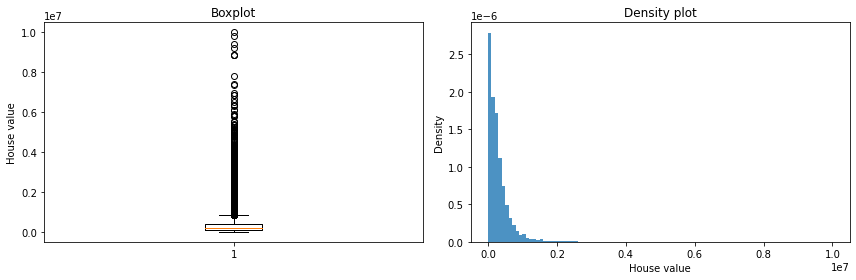

In [ ]:
# create a canvas with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# generate a boxplot for house values
axs[0].boxplot(data['house_val'])
# define the y axis label
axs[0].set_ylabel('House value')
# define the title
axs[0].set_title('Boxplot')

# generate a density histogram plot for house values
axs[1].hist(data['house_val'], density=True, alpha=0.8, bins=100)
# define the x axis label
axs[1].set_xlabel('House value')
# define the y axis label
axs[1].set_ylabel('Density')
# define the title
axs[1].set_title('Density plot')

# adjust the layout to prevent overlap
fig.tight_layout()
# show the plot
plt.show()

Here, to deal with outliers the variable is going to be converted to categorical using binning technique. \
A hypothesis here is that house values can have different distributions in diffent regions (houses of the same value can be considered of different price level depending on the location), therefore need to test this hypothesis by visualising **median values for houses in all regions**

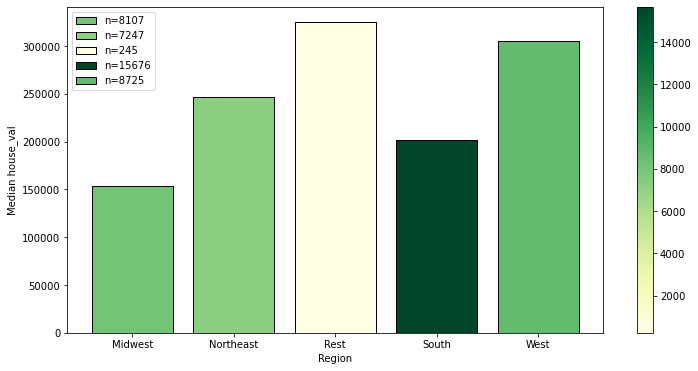

           house_val
region              
Midwest     153733.0
South       201815.5
Northeast   246754.0
West        304785.0
Rest        324983.0


In [ ]:
# calculate the median values, number of observations per region, 
# and the minimum and maximum number of observations
medians = data[['region','house_val']].groupby('region').median()
counts = data['region'].value_counts()
min_count = counts.min()
max_count = counts.max()

# define the color map
cmap = plt.cm.get_cmap('YlGn')
norm = plt.Normalize(vmin=counts.min(), vmax=counts.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# generate a bar plot of the median house value per region
# with a color gradient based on number of observations
fig, ax = plt.subplots(figsize=(12, 6))
for i, (idx, row) in enumerate(medians.iterrows()):
    # get the color for the current region based on the number of observations
    color = cmap(norm(counts[idx]))
    # create a bar for the current region with the median house value as the height
    ax.bar(idx, row['house_val'], 
           color=color, edgecolor='black', 
           label=f'n={counts[idx]}')

# define axis labels
ax.set_xlabel('Region')
ax.set_ylabel('Median house_val')
# add a legend
ax.legend()
# add a color bar
fig.colorbar(sm)
# show the plot
plt.show()

# print the table with median values
print(medians.sort_values(by=['house_val']))

From the plot it is evident that there is likely a significant difference in house prices across regions, however to confirm this we can use a **one-way ANOVA** (analysis of variance) test to compare the mean house value across different regions.

In [ ]:
# create a list of regions
regions = set(data['region'])
# create a dictionary to store the house values for each region
house_values = {}
for region in regions:
    house_values[region] = data.loc[data['region'] == region]['house_val']

# perform a one-way ANOVA test
f_statistic, p_value = f_oneway(*house_values.values())

# print out the p-value
print('p-value:', p_value)
print('rounded p-value:', np.round(p_value, 10))

p-value: 6e-323
rounded p-value: 0.0


**A low p-value indicates that the evidence against the null hypothesis (there is no difference in mean house values among the regions) is strong**, and we can reject the null hypothesis in favor of the alternative hypothesis.

To reduce the outlier impact and accomodate the differences in price across regions, **bining the houses inside each region using percentiles as cut off points**.

In [ ]:
# create empty dictionaries to store percentiles and bins for each region
region_percentiles = {}
region_bins = {}

# iterate over each region in the dataset
# and calculate percentiles and bins for each region
for region in set(data['region']):
    # extract the house values for the current region
    region_house_values = data.loc[data['region'] == region, 'house_val']
    # calculate the percentiles for the region
    region_percentiles[region] = {
        'q1': np.percentile(region_house_values[region_house_values != 0], 25),
        'q2': np.percentile(region_house_values[region_house_values != 0], 50),
        'q3': np.percentile(region_house_values[region_house_values != 0], 85)
    }

# assign each observation to a bin based on its house value and its region's 
# percentiles and store the bin labels in a new column
data['house_val_region_bin'] = np.zeros(len(data))
for i, row in data.iterrows():
    region = row['region']
    percentiles = region_percentiles[region]
    house_value = row['house_val']
    if house_value == 0:
        data.loc[i, 'house_val_region_bin'] = 'none'
    elif house_value <= percentiles['q1']:
        data.loc[i, 'house_val_region_bin'] = 'low'
    elif house_value <= percentiles['q2']:
        data.loc[i, 'house_val_region_bin'] = 'below_median'
    elif house_value <= percentiles['q3']:
        data.loc[i, 'house_val_region_bin'] = 'above_median'  
    else:
        data.loc[i, 'house_val_region_bin'] = 'high' 

Displaying the distribution of a new variable using histogram and a table with a value count

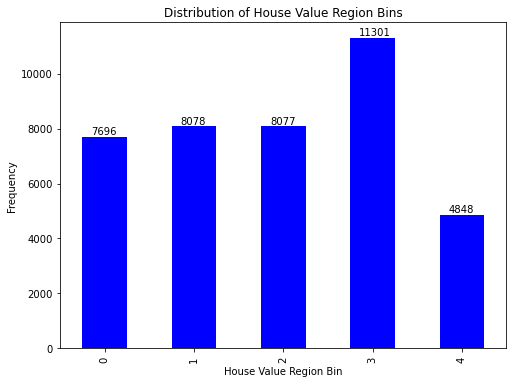

In [ ]:
# create histogram
fig, ax = plt.subplots(figsize=(8, 6))
data['house_val_region_bin'].value_counts().sort_index().plot(kind='bar', color='blue', ax=ax)

# add axis labels and title
ax.set_xlabel('House Value (binned)')
ax.set_ylabel('Observations')
ax.set_title('Distribution of House Value')

# add labels to bars
for i in ax.patches:
    ax.text(i.get_x() + 0.1, i.get_height() + 100, str(round(i.get_height())), fontsize=10)

# show the plot
plt.show()

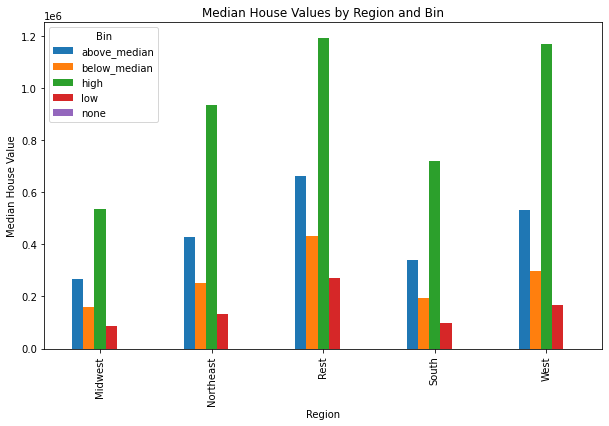

house_val_region_bin  above_median  below_median       high       low  none
region                                                                     
Midwest                   265524.0      160177.0   535724.0   87360.0   0.0
Northeast                 429759.0      251790.0   934675.0  132173.0   0.0
Rest                      662959.0      430550.0  1192405.0  272729.0   0.0
South                     340843.0      192150.0   721396.0   96824.0   0.0
West                      530775.0      298976.0  1168970.0  166388.0   0.0
---
house_val_region_bin  above_median  below_median  high   low  none
region                                                            
Midwest                       2183          1562   937  1561  1864
Northeast                     1998          1427   857  1428  1537
Rest                            57            41    25    42    80
South                         4585          3276  1966  3276  2573
West                          2478          1771  1063  1771  

In [ ]:
# group the data by region and bin and calculate the median house value for each region
grouped = data.groupby(['region', 'house_val_region_bin'])['house_val'].median().unstack()

# generate a grouped bar chart
ax = grouped.plot(kind='bar', figsize=(10, 6))

# set the chart title and axis labels
ax.set_title('Median House Values by Region and Bin')
ax.set_xlabel('Region')
ax.set_ylabel('Median House Value')

# add a legend
ax.legend(title='Bin')

# show the plot
plt.show()

# print out data in a tabular format
print(grouped)
print('---')
print(data.groupby(['region', 'house_val_region_bin']).size().unstack())

Dropping the initial 'house_val' variable from a data frame

In [ ]:
data = data.drop(columns=['house_val'])

First of all, in order to understand how the distributions differ between two classes of customers generate the violin plots of each predictor stratified by the response variable

#### 2.5. Encoding categorical data

Ordinal variables have a natural ordering to them so using **integer encoding** the following variables: 
1. education
2. age
3. mortgage
4. fam_income
5. house_val_region_bin

For these variables, if missing values are present, they are going to be coded as 0 with creation of a separate binary variable indicating that information is missing.

**One-hot encoding** does not take into account the natural ordering of the categories, so will be used to encode the following variables:
1. gender
2. house_owner
3. marriage (since unknown category is present)
4. child (since unknown category is present)
5. occupation
6. region

**Dummy encoding** is similar to one-hot encoding, but drops one category, so the following variables are going to be dummy encoded since they have only two unique values:
1. flag
2. online

**Integer encoding**

**1.** 'education' variable

Performing integer encoding by taking first character of a string as an integer (adding 1 because there are no unknowns)

In [ ]:
# perform integer encoding and assign first character as string
data['education'] = data['education'].str[0].astype(int).add(1)
data.education.value_counts()

3    12141
4     9267
2     8828
5     5916
1     3848
Name: education, dtype: int64

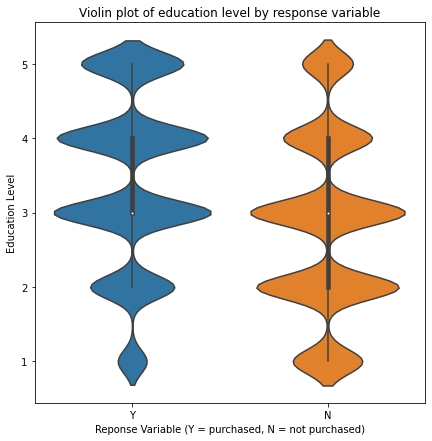

In [ ]:
# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )

# generate a violin plot with seaborn
sns.violinplot(x='flag', 
               y='education', 
               data=data, 
               split=True)

# add plot and axis labels
plt.xlabel('Reponse Variable (Y = purchased, N = not purchased)')
plt.ylabel('Education Level')
plt.title('Violin plot of education level by response variable')

# show the plot
plt.show()

**2.** 'age' variable

Creating binary variable indicating that age is unknown

In [ ]:
data['age_unknown'] = data['age'].isin(['1_Unk']).astype(int)
data.age_unknown.value_counts()

0    33291
1     6709
Name: age_unknown, dtype: int64

Performing the encoding in a similar way

In [ ]:
data['age'] = data['age'].str[0].astype(int).subtract(1)
data.age.value_counts()

4    8103
3    7115
0    6709
5    5907
2    4984
6    4822
1    2360
Name: age, dtype: int64

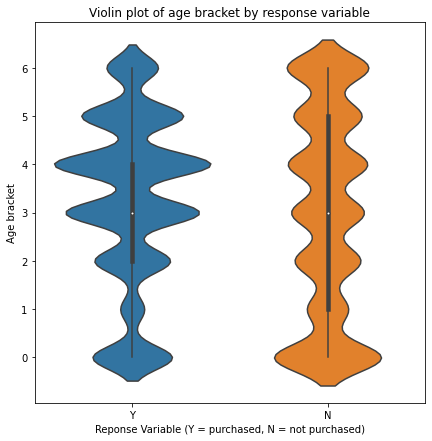

In [ ]:
# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )

# generate a violin plot with seaborn
sns.violinplot(x='flag', 
               y='age', 
               data=data, 
               split=True)

# add plot and axis labels
plt.xlabel('Reponse Variable (Y = purchased, N = not purchased)')
plt.ylabel('Age bracket')
plt.title('Violin plot of age bracket by response variable')

# show the plot
plt.show()

**3.** 'mortgage' variable

In [ ]:
data.mortgage.value_counts()

1Low     29848
3High     5349
2Med      4803
Name: mortgage, dtype: int64

In [ ]:
data['mortgage'] = data['mortgage'].str[0].astype(int)
data.mortgage.value_counts()

1    29848
3     5349
2     4803
Name: mortgage, dtype: int64

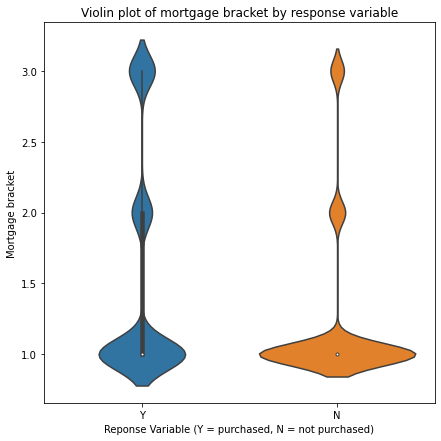

In [ ]:
# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )

# generate a violin plot with seaborn
sns.violinplot(x='flag', 
               y='mortgage', 
               data=data, 
               split=True)

# add plot and axis labels
plt.xlabel('Reponse Variable (Y = purchased, N = not purchased)')
plt.ylabel('Mortgage bracket')
plt.title('Violin plot of mortgage bracket by response variable')

# show the plot
plt.show()

**4.** 'fam_income' variable 

In [ ]:
data.fam_income.value_counts()

E    8432
F    6641
D    4582
G    4224
C    2687
H    2498
A    2274
B    2169
I    1622
L    1617
J    1614
K    1487
U     153
Name: fam_income, dtype: int64

Creating a binary variable indicating a missing value in 'fam_income'

In [ ]:
data['fam_income_unknown'] = data['fam_income'].isin(['U']).astype(int)
data.fam_income.value_counts()

E    8432
F    6641
D    4582
G    4224
C    2687
H    2498
A    2274
B    2169
I    1622
L    1617
J    1614
K    1487
U     153
Name: fam_income, dtype: int64

Defining a function to convert letters to integers and then applying it to a variable in a dataset

In [ ]:
# define a function that converts a character string to an integer
def letter_to_int(x):
    # if input is 'U', return 0
    if x == 'U': 
        return 0
    # otherwise, calculate the integer value based on ASCII code of the input character
    # (subtracting 64 from the ASCII code maps A to 1, B to 2, and so on)
    else: 
        return len(data.fam_income.unique()) - (ord(x)-64)

# apply the function to every element in the column
data['fam_income'] = data['fam_income'].apply(letter_to_int)

data.fam_income.value_counts()

8     8432
7     6641
9     4582
6     4224
10    2687
5     2498
12    2274
11    2169
4     1622
1     1617
3     1614
2     1487
0      153
Name: fam_income, dtype: int64

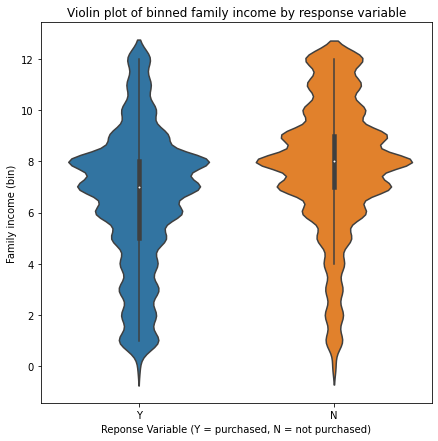

In [ ]:
# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )

# generate a violin plot with seaborn
sns.violinplot(x='flag', 
               y='fam_income', 
               data=data, 
               split=True)

# add plot and axis labels
plt.xlabel('Reponse Variable (Y = purchased, N = not purchased)')
plt.ylabel('Family income (bin)')
plt.title('Violin plot of binned family income by response variable')

# show the plot
plt.show()

**5.** 'house_val_region_bin' variable

In [ ]:
data['house_val_region_bin_none'] = data['house_val_region_bin'].isin(['none']).astype(int)
data.house_val_region_bin_none.value_counts()

0    32304
1     7696
Name: house_val_region_bin_none, dtype: int64

In [ ]:
# encode the column using the mapping dictionary
data['house_val_region_bin'] = data['house_val_region_bin'].map(
    {'none': 0, 'low': 1, 'below_median': 2, 'above_median': 3, 'high': 4}
)
data.house_val_region_bin.value_counts()

3    11301
1     8078
2     8077
0     7696
4     4848
Name: house_val_region_bin, dtype: int64

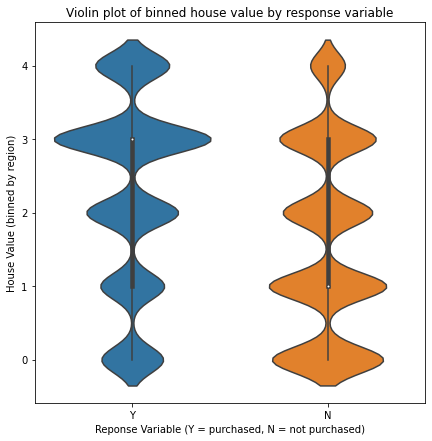

In [ ]:
# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )

# generate a violin plot with seaborn
sns.violinplot(x='flag', 
               y='house_val_region_bin', 
               data=data, 
               split=True)

# add plot and axis labels
plt.xlabel('Reponse Variable (Y = purchased, N = not purchased)')
plt.ylabel('House Value (binned by region)')
plt.title('Violin plot of binned house value by response variable')

# show the plot
plt.show()

**One-hot encoding**

To perform the one-hot encoding the sklearn OneHotEncoder module is used

First, creating an encoder object

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

Specifying the columns to one-hot encode

In [ ]:
onehotcols = ['gender', 
              'house_owner', 
              'marriage', 
              'child', 
              'occupation', 
              'region']

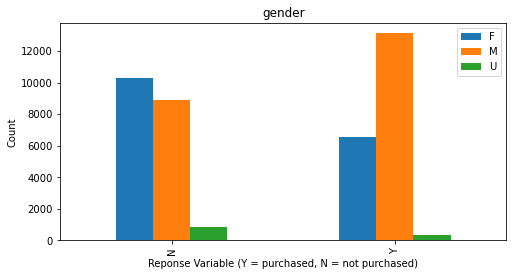

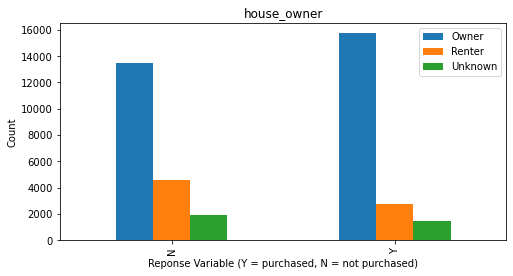

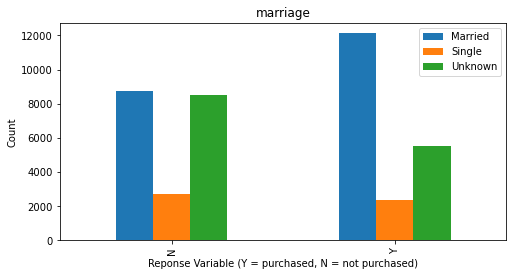

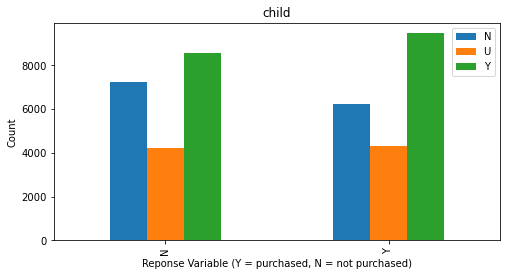

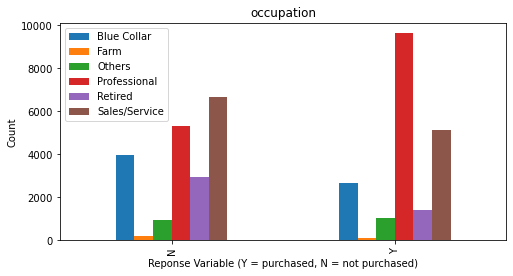

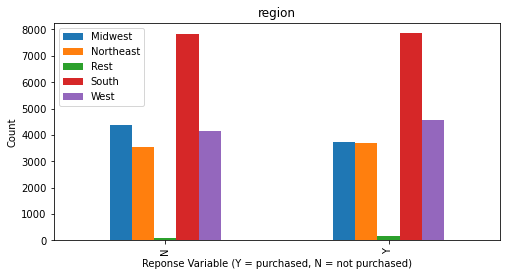

In [ ]:
# create histograms for each categorical variable separated by response variable
for col in onehotcols:
    fig, ax = plt.subplots(figsize=(8, 4))
    data.groupby(['flag', col]).size().unstack().plot(kind='bar', stacked=False, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Reponse Variable (Y = purchased, N = not purchased)')
    ax.set_ylabel('Count')
    ax.legend()
    plt.show()

Performing transformations on specific columns using a created object

In [ ]:
onehotencoded = encoder.fit_transform(data[onehotcols])

Creating a list with new column names

In [ ]:
newcols = encoder.get_feature_names(onehotcols)

Merge new columns to original dataframe and drop the original columns

In [ ]:
data = pd.concat([data.drop(columns=onehotcols), pd.DataFrame(onehotencoded, columns=newcols)], axis=1)

Display the information about the dataframe to check the result

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   flag                       40000 non-null  object 
 1   education                  40000 non-null  int64  
 2   age                        40000 non-null  int64  
 3   online                     40000 non-null  object 
 4   mortgage                   40000 non-null  int64  
 5   fam_income                 40000 non-null  int64  
 6   education_missing          40000 non-null  int64  
 7   house_val_region_bin       40000 non-null  int64  
 8   age_unknown                40000 non-null  int64  
 9   fam_income_unknown         40000 non-null  int64  
 10  house_val_region_bin_none  40000 non-null  int64  
 11  gender_F                   40000 non-null  float64
 12  gender_M                   40000 non-null  float64
 13  gender_U                   40000 non-null  flo

**Dummy encoding**

In [ ]:
dummycols = ['flag', 'online']
data = pd.get_dummies(data, 
                      columns=dummycols, 
                      drop_first=True,
                      dtype = int).rename(columns={'flag_Y': 'flag', 
                                                   'online_Y': 'online'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   education                  40000 non-null  int64  
 1   age                        40000 non-null  int64  
 2   mortgage                   40000 non-null  int64  
 3   fam_income                 40000 non-null  int64  
 4   education_missing          40000 non-null  int64  
 5   house_val_region_bin       40000 non-null  int64  
 6   age_unknown                40000 non-null  int64  
 7   fam_income_unknown         40000 non-null  int64  
 8   house_val_region_bin_none  40000 non-null  int64  
 9   gender_F                   40000 non-null  float64
 10  gender_M                   40000 non-null  float64
 11  gender_U                   40000 non-null  float64
 12  house_owner_Owner          40000 non-null  float64
 13  house_owner_Renter         40000 non-null  flo

#### 2.6. Feature engineering

**Income to house value ratio**

By dividing the family income bracket by the house value we could identify customers who are likely to have more disposable income

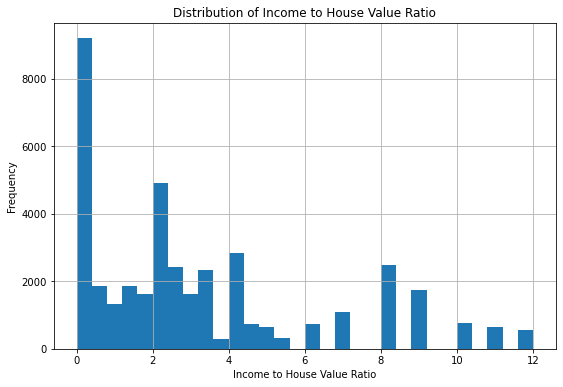

In [ ]:
# calculate the income to house value ratio
data['income_to_house_val_ratio'] = np.where(data['house_val_region_bin'] == 0, 
                                             0, 
                                             data['fam_income'] / data['house_val_region_bin'])

# create histogram of income_to_house_val_ratio variable
fig, ax = plt.subplots(figsize=(9, 6))
data['income_to_house_val_ratio'].hist(bins=30, ax=ax)

# add axis labels and title
ax.set_xlabel('Income to House Value Ratio')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Income to House Value Ratio')

# show plot
plt.show()

#### 2.7. Checking for class imbalance in a response variable

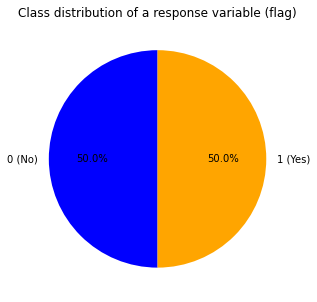

In [ ]:
plt.figure(figsize=(9, 5))
# generate a pie chart of the frequency counts
plt.pie(data['flag'].value_counts(), 
        labels = ['0 (No)', '1 (Yes)'], 
        colors = ['blue', 'orange'], 
        autopct='%1.1f%%', 
        startangle=90)

# add a title
plt.title('Class distribution of a response variable (flag)')
# show the plot
plt.show()

The response variable is **perfectly balanced**, so there is no need to perform any actions to balance it

In [ ]:
data.to_csv('assignment_data_clean.csv', index=False)

### 3. Supervised machine learning modelling

In [ ]:
data = pd.read_csv('assignment_data_clean.csv')

Randomizing rows in a dataframe (just in case they are not random)

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In this section I will apply the following algorithms: 
1. Logistic regression
2. Tree-based algorithms (decision tree, random forest and gradient boosting)
3. Naive Bayes classifier
4. k-Nearest Neighbors classifier

First, creating a dataframe to store the true response values and write predictions from each model:

In [ ]:
prediction_results = pd.DataFrame(data.rename(columns={'flag': 'response_true'})['response_true'])
prediction_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   response_true  40000 non-null  int64
dtypes: int64(1)
memory usage: 312.6 KB


#### 3.1. Logistic regression

Separating the predictors and the response variable

In [ ]:
X = data.drop('flag', axis=1)
y = data['flag']

Scaling predictor variables to ensure that the algorithm converge faster and more reliably

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Creating the logistic regression model object

In [ ]:
logistic_model = LogisticRegression()

To select the best set of variables for a logistic regression model, the **RFECV** (recursive feature elimination with cross-validation) method is used with **StratifiedKFold** cross-validation method (k=10) to ensure balanced class distribution in each fold:

In [ ]:
selector = RFECV(estimator=logistic_model, 
                 step=1, 
                 cv=StratifiedKFold(10), 
                 scoring='roc_auc')
selector.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='roc_auc')

Model determined the best set of predictors.\
Extracting these columns and saving them to a variable:

In [ ]:
# extract indices of the result variables
selected_indices = selector.get_support(indices=True)
# extract names of the result variables
selected_variables = data.drop('flag', axis=1).columns[selected_indices]
# print out variable names
selected_variables

Index(['education', 'age', 'mortgage', 'fam_income', 'education_missing',
       'house_val_region_bin', 'house_val_region_bin_none', 'gender_F',
       'gender_M', 'gender_U', 'marriage_Married', 'marriage_Single',
       'marriage_Unknown', 'child_N', 'child_U', 'child_Y',
       'occupation_Blue Collar', 'occupation_Farm', 'occupation_Others',
       'occupation_Professional', 'occupation_Retired', 'region_Midwest',
       'region_Rest', 'online', 'income_to_house_val_ratio'],
      dtype='object')

RFECV iteratively removes the least important variable based on predictive performance, however it **doesn't take into account the statistical significance (p-values)**

In sklearn the logistic regression model **doesn't provide p-values**, so the **statsmodels** library is used for this purpose

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[:, selected_indices], 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y)

# add a constant
X_train = sm.add_constant(X_train)

# fit a model to the training data
log_model_sm = sm.Logit(y_train, X_train).fit()

# display the summary
log_model_sm.summary()

         Current function value: 0.590906
         Iterations: 35


/Users/nikita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   flag   No. Observations:                32000
Model:                          Logit   Df Residuals:                    31977
Method:                           MLE   Df Model:                           22
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.1475
Time:                        11:33:10   Log-Likelihood:                -18909.
converged:                      False   LL-Null:                       -22181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.012     -0.010      0.992      -0.025       0.024
x1             0.2447      0.014     17.658      0.000       0.218       0.272
x2             0.1662      0.016     10.707      0.000       0.136       0.197
x3             0.1747      0.015     11.791      0.000       0.146       0.204
x4            -0.0865      0.018     -4.771      0.000      -0.122      -0.051
x5             0.0975      0.013      7.700      0.000       0.073       0.122
x6             0.0576      0.038      1.516      0.130      -0.017       0.132
x7            -0.1778      0.046     -3.841      0.000      -0.268      -0.087
x8            -0.1750   8.07e+05  -2.17e-07      1.000   -1.58e+06    1.58e+06
x9             0.2031   8.13e+05    2.5e-07      1.000   -1.59e+06    1.59e+06
x10           -0.0874   2.73e+05   -3.2e-07      1.000   -5.36e+05    5.36e+05
x11            0.0714   6.38e+05   1.12e-07      1.000   -1.25e+06    1.25e+06
x12            0.0930   4.25e+05   2.19e-07      1.000   -8.34e+05    8.34e+05
x13           -0.1396    6.1e+05  -2.29e-07      1.000   -1.19e+06    1.19e+06
x14           -0.0776        nan        nan        nan         nan         nan
x15            0.0526        nan        nan        nan         nan         nan
x16            0.0304        nan        nan        nan         nan         nan
x17           -0.0769      0.014     -5.346      0.000      -0.105      -0.049
x18           -0.0458      0.013     -3.539      0.000      -0.071      -0.020
x19            0.0386      0.013      2.913      0.004       0.013       0.065
x20            0.1323      0.016      8.408      0.000       0.101       0.163
x21           -0.2211      0.016    -13.556      0.000      -0.253      -0.189
x22           -0.0681      0.013     -5.443      0.000      -0.093      -0.044
x23            0.0415      0.012      3.385      0.001       0.017       0.065
x24            0.2965      0.013     22.490      0.000       0.271       0.322
x25           -0.1746      0.035     -4.930      0.000      -0.244      -0.105
==============================================================================
"""

Number of variables in the model are statistically insignificant (with p-values greater than 0.05), and perfect multicollinearity is introduced by one-hot encoded variables

To remove these variables the **backward stepwise variable selection** technique is used to further improve the selection of variables.

The following chunk of code takes a list of variables selected by RFECV and enters a while loop that performs the following steps until it finds a set of predictors with statistically significant p-values (less than 0.05) or until it has removed all predictors from the list of selected variables:

1. Fit a model using the current set of variables
2. Get the p-values for the remaining variables
3. Find the variable with the maximum p-value
4. If the maximum p-value is less than 0.05, exit the loop and fit a final model using the selected variables
5. Otherwise, remove the variable with the maximum p-value from the list of selected variables

In [ ]:
# refresh the X and y variables just in case
X = data.drop('flag', axis=1)
y = data['flag']
# no need to scale since statsmodels does it automatically 

# add a constant term
X = sm.add_constant(X)

# initialize the list of selected variables
selected_variables = selected_variables.tolist()
# add const to a list of variables
selected_variables.append('const')

# check if there are any variables left to select
if len(selected_variables) == 0:
    print('No variables')
else:
    while True:
        # fit a model with the current set of variables
        log_model_sm = sm.Logit(y, X[selected_variables])
        log_reg_result = log_model_sm.fit()

        # get the p-values for the remaining variables
        p_values = log_reg_result.pvalues.drop('const')

        # find the variable with maximum pvalue
        max_pvar = p_values.idxmax()
        max_pval = p_values[max_pvar]

        # if the max p-value is less than 0.05, break the while loop
        if max_pval < 0.05:
            break

        # otherwise, remove the variable with maximum p-value
        selected_variables.remove(max_pvar)

    # fit a final model
    log_model_sm_final = sm.Logit(y, X[selected_variables])
    log_reg_result_final = log_model_sm_final.fit()

    # print out a summary
    print(log_reg_result_final.summary())

/Users/nikita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.591936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591961
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591961
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591961
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591961
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591985
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.591985
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   flag   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39979
Method:                           MLE   Df Model:

In [ ]:
selected_variables.remove('const')

In [ ]:
selected_variables

['education',
 'age',
 'mortgage',
 'fam_income',
 'education_missing',
 'house_val_region_bin_none',
 'gender_F',
 'gender_U',
 'marriage_Married',
 'marriage_Unknown',
 'child_N',
 'occupation_Blue Collar',
 'occupation_Farm',
 'occupation_Others',
 'occupation_Professional',
 'occupation_Retired',
 'region_Midwest',
 'region_Rest',
 'online',
 'income_to_house_val_ratio']

In [ ]:
selected_indices = [data.drop('flag', axis=1).columns.get_loc(col) for col in selected_variables]
selected_indices

[0, 1, 2, 3, 4, 8, 9, 11, 15, 17, 18, 21, 22, 23, 24, 25, 27, 29, 32, 33]

Now, all variables in the model are statistically significant and algorithm succesfully converges, therefore fitting the model using previously selected variables

In [ ]:
# refresh the X and y variables just in case
X = data.drop('flag', axis=1)
y = data['flag']

# scale the predictor variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# create a new logistic regression object
logistic_model = LogisticRegression()

Creating a cross validation object with 100 folds, 
which means that the data will be split into 100 subsets 
with each subset will be used once as a test set while the remaining subsets are used as training sets

In [ ]:
cv = KFold(n_splits=10)

Creating an empty array to be used to store the predicted probabilities for each test sample

In [ ]:
logreg_probs = np.empty((y.shape[0], 2))

Defining a for loop that:
1. takes an index pair as input
2. slices the data into training and test sets using these indices
3. fits the model on the training set
4. makes a prediction on the test set
5. writes the result to an array

In [ ]:
for train_index, test_index in cv.split(X):
    # slice the training and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # fit the model on the training set
    logistic_model.fit(X_train[:, selected_indices], y_train)

    # predict on the test set and write the result to an array
    logreg_probs[test_index] = logistic_model.predict_proba(X_test[:, selected_indices])

Concatenating the array with predicted probabilities as a column to a previously created table for storing predictions of different models

In [ ]:
prediction_results = pd.concat([prediction_results, 
                                pd.DataFrame(logreg_probs).iloc[:,1].rename('logistic_regression')
                                ], axis=1)
prediction_results

,response_true,logistic_regression
0,0,0.258985
1,1,0.502706
2,1,0.643262
3,1,0.232170
4,0,0.557133
...,...,...
39995,0,0.400405
39996,1,0.721834
39997,1,0.739901
39998,0,0.434601


Calculating the AUC-ROC score and plotting the ROC curve

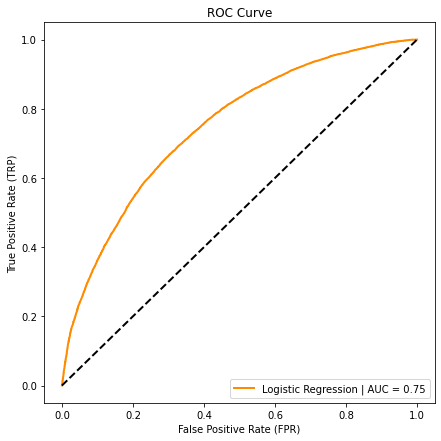

In [ ]:
# calculate the true positive rate and false positive rate 
# using true response values and predictions by a model
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(prediction_results.loc[:, 'response_true'], 
                                                      prediction_results.loc[:, 'logistic_regression'])
# calculate the area under the ROC curve
logreg_roc_auc = auc(logreg_fpr, logreg_tpr)

# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )
# plot the ROC curve (label shows AUC value)
plt.plot(logreg_fpr, logreg_tpr, 
         color='darkorange',
         lw=2, 
         label='Logistic Regression | AUC = %0.2f' % logreg_roc_auc)
# plot the baseline of a random classifier
plt.plot([0, 1], [0, 1], 
         color='black', 
         lw=2, 
         linestyle='--')
# add plot and axis labels
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TRP)')
plt.title('ROC Curve')
# add a legend in a lower right corner
plt.legend(loc="lower right")
# show a plot
plt.show()

Calculating the confusion matrix and performance metrics

In [ ]:
# generate a confusion matrix using sklearn passing columns from a results table
log_reg_cm = confusion_matrix(prediction_results.loc[:, 'response_true'], 
                              np.round(prediction_results.loc[:, 'logistic_regression']))
# print out the matrix
print('Confusion matrix')
print(' ')
print(log_reg_cm)
print('------')

# calculate a performance metrics
log_reg_report = classification_report(prediction_results.loc[:, 'response_true'], 
                               np.round(prediction_results.loc[:, 'logistic_regression']))
# print out the metrics
print('Classification report')
print(' ')
print(log_reg_report)

Confusion matrix
 
[[13614  6386]
 [ 6353 13647]]
------
Classification report
 
              precision    recall  f1-score   support

           0       0.68      0.68      0.68     20000
           1       0.68      0.68      0.68     20000

    accuracy                           0.68     40000
   macro avg       0.68      0.68      0.68     40000
weighted avg       0.68      0.68      0.68     40000



#### 3.2. Tree-based models
#### 3.2.1. Decision Tree

Optimizing the hyperparameters of the decision tree model (function to measure the quality of a split, maximum depth of the decision tree, minimum number of samples required to split an internal node and to be at a leaf node)

In [ ]:
# create the decision classifier object
dt_model = DecisionTreeClassifier()

# define the dictionary of hyperparameters for tuning
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# create and fit an object for hyperparameter tuning
dt_grid_search = GridSearchCV(dt_model,
                           param_grid=dt_param_grid, 
                           cv=KFold(n_splits=10), 
                           scoring='roc_auc',
                           n_jobs=4).fit(X, y)

# print out the best parameters and the corresponding AUC
print("Best parameters:", dt_grid_search.best_params_)
print("AUC:", dt_grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
AUC: 0.7431806171751137


Using the set of optimized hyperparameters to fit a decision tree model

In [ ]:
# retrieve the best hyperparameters obtained from the grid search
dt_best_params = dt_grid_search.best_params_

# create a decision tree classifier passing the hyperparameters
dt_model = DecisionTreeClassifier(
    criterion=dt_best_params['criterion'],
    max_depth=dt_best_params['max_depth'],
    min_samples_split=dt_best_params['min_samples_split'],
    min_samples_leaf=dt_best_params['min_samples_leaf']
)

# create a cross validation object
cv = KFold(n_splits=10)

# create an empty array to store the predicted probabilities 
# for each test sample
dt_probs = np.empty((y.shape[0], 2))

# loop over each fold of the data
for train_index, test_index in cv.split(X):
    # get the training and test data for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # fit the model
    dt_model.fit(X_train, y_train)

    # predict the probabilites and write them to an array
    dt_probs[test_index] = dt_model.predict_proba(X_test)

# add the column with predicted probabilities to a data frame
prediction_results = pd.concat([
    prediction_results, 
    pd.DataFrame(dt_probs).iloc[:,1].rename('decision_tree')
], axis=1)

Calculate and visualize the ROC curve (with AUC)

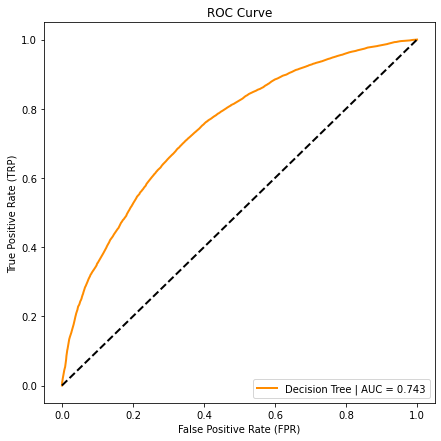

In [ ]:
# calculate the true positive rate and false positive rate 
# using true response values and predictions by a model
dt_fpr, dt_tpr, dt_thresholds = roc_curve(prediction_results.loc[:, 'response_true'], 
                                          prediction_results.loc[:, 'decision_tree'])
# calculate the area under the ROC curve
dt_roc_auc = auc(dt_fpr, dt_tpr)

# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )
# plot the ROC curve (label shows AUC value)
plt.plot(dt_fpr, dt_tpr, 
         color='darkorange',
         lw=2, 
         label='Decision Tree | AUC = %0.3f' % dt_roc_auc)
# plot the baseline of a random classifier
plt.plot([0, 1], [0, 1], 
         color='black', 
         lw=2, 
         linestyle='--')
# add plot and axis labels
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TRP)')
plt.title('ROC Curve')
# add a legend in a lower right corner
plt.legend(loc="lower right")
# show a plot
plt.show()

Calculate and print a confusion matrix with model performance metrics

In [ ]:
# generate a confusion matrix using sklearn passing columns from a results table
dt_cm = confusion_matrix(prediction_results.loc[:, 'response_true'], 
                         np.round(prediction_results.loc[:, 'decision_tree']))
# print out the matrix
print('Confusion matrix')
print(' ')
print(dt_cm)
print('------')

# calculate a performance metrics
dt_report = classification_report(prediction_results.loc[:, 'response_true'], 
                                  np.round(prediction_results.loc[:, 'decision_tree']))
# print out the metrics
print('Classification report')
print(' ')
print(dt_report)

Confusion matrix
 
[[13198  6802]
 [ 6013 13987]]
------
Classification report
 
              precision    recall  f1-score   support

           0       0.69      0.66      0.67     20000
           1       0.67      0.70      0.69     20000

    accuracy                           0.68     40000
   macro avg       0.68      0.68      0.68     40000
weighted avg       0.68      0.68      0.68     40000



####  3.2.2. Random forest

Optimizing the hyperparameters of the random forest (number of trees estimated,  function to measure the quality of a split, maximum depth of each decision tree and number of features to consider during each split)

In [ ]:
# create the random forest classifier object
rf_model = RandomForestClassifier()

# define the dictionary of hyperparameters for tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None]
}

# create and fit an object for hyperparameter tuning
rf_grid_search = GridSearchCV(rf_model,
                              param_grid=rf_param_grid, 
                              cv=KFold(n_splits=10), 
                              scoring='roc_auc',
                              n_jobs=4,
                              verbose=1).fit(X, y)

# print out the best parameters and the corresponding AUC
print("Best parameters:", rf_grid_search.best_params_)
print("AUC:", rf_grid_search.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150}
AUC: 0.7496769007000135


In [ ]:
# retrieve the best hyperparameters obtained from the grid search
rf_best_params = rf_grid_search.best_params_

# create a random forest classifier passing the hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=rf_best_params['n_estimators'],
    criterion=rf_best_params['criterion'],
    max_depth=rf_best_params['max_depth'],
    max_features=rf_best_params['max_features']
)

# create a cross validation object
cv = KFold(n_splits=10)

# create an empty array to store the predicted probabilities 
# for each test sample
rf_probs = np.empty((y.shape[0], 2))

# loop over each fold of the data
for train_index, test_index in cv.split(X):
    # get the training and test data for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # fit the model
    rf_model.fit(X_train, y_train)

    # predict the probabilites and write them to an array
    rf_probs[test_index] = rf_model.predict_proba(X_test)

# add the column with predicted probabilities to a data frame
prediction_results = pd.concat([
    prediction_results, 
    pd.DataFrame(rf_probs).iloc[:,1].rename('random_forest')
], axis=1)

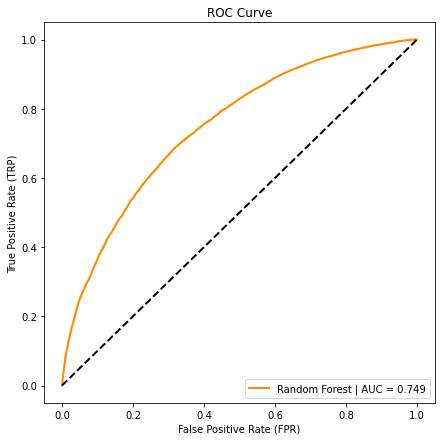

In [ ]:
# calculate the true positive rate and false positive rate 
# using true response values and predictions by the Random Forest model
rf_fpr, rf_tpr, rf_thresholds = roc_curve(prediction_results.loc[:, 'response_true'], 
                                          prediction_results.loc[:, 'random_forest'])
# calculate the area under the ROC curve
rf_roc_auc = auc(rf_fpr, rf_tpr)

# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )
# plot the ROC curve (label shows AUC value)
plt.plot(rf_fpr, rf_tpr, 
         color='darkorange',
         lw=2, 
         label='Random Forest | AUC = %0.3f' % rf_roc_auc)
# plot the baseline of a random classifier
plt.plot([0, 1], [0, 1], 
         color='black', 
         lw=2, 
         linestyle='--')
# add plot and axis labels
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TRP)')
plt.title('ROC Curve')
# add a legend in a lower right corner
plt.legend(loc="lower right")
# show a plot
plt.show()

In [ ]:
# generate a confusion matrix using sklearn passing columns from a results table
rf_cm = confusion_matrix(prediction_results.loc[:, 'response_true'], 
                         np.round(prediction_results.loc[:, 'random_forest']))
# print out the matrix
print('Confusion matrix')
print(' ')
print(rf_cm)
print('------')

# calculate a performance metrics
rf_report = classification_report(prediction_results.loc[:, 'response_true'], 
                                  np.round(prediction_results.loc[:, 'random_forest']))
# print out the metrics
print('Classification report')
print(' ')
print(rf_report)

Confusion matrix
 
[[13902  6098]
 [ 6543 13457]]
------
Classification report
 
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     20000
           1       0.69      0.67      0.68     20000

    accuracy                           0.68     40000
   macro avg       0.68      0.68      0.68     40000
weighted avg       0.68      0.68      0.68     40000



Evaluate the feature importances across trees

In [ ]:
# fit the model on the whole dataset
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# get the feature importance scores
importance_scores = rf_model.feature_importances_

# create a dictionary with colnames and importances
feature_importance = dict(zip(data.drop('flag', axis=1).columns, 
                              importance_scores))

# sort the dictionary by the score
sorted_feature_importance = {k: v for k, v in sorted(feature_importance.items(), 
                                                     key=lambda item: item[1], 
                                                     reverse=True)}

# print out the sorted feature importance scores 
for feature, importance in sorted_feature_importance.items():
    print(feature + ':', importance)

fam_income: 0.11966445403179767
age: 0.11428183673888845
education: 0.1068218461845418
income_to_house_val_ratio: 0.10362698817949764
house_val_region_bin: 0.0590877836107692
mortgage: 0.040349315790719896
online: 0.03792396057286675
occupation_Professional: 0.031156887017524778
region_South: 0.02704652837722371
region_West: 0.023742619141204173
gender_M: 0.023476999269800073
child_Y: 0.023120155746414767
region_Midwest: 0.022812363315864954
region_Northeast: 0.02247360576085857
child_N: 0.021351805411425916
child_U: 0.020623820078306893
gender_F: 0.019259315558538985
marriage_Unknown: 0.018906159161877628
marriage_Married: 0.018595262253465174
occupation_Sales/Service: 0.017993722117431183
house_owner_Owner: 0.016147077280544642
occupation_Blue Collar: 0.01482961524163637
house_owner_Renter: 0.01475168848919877
age_unknown: 0.012798993296724745
house_owner_Unknown: 0.011733236242164095
marriage_Single: 0.011701062379387778
occupation_Others: 0.009897557469667565
occupation_Retired: 0.

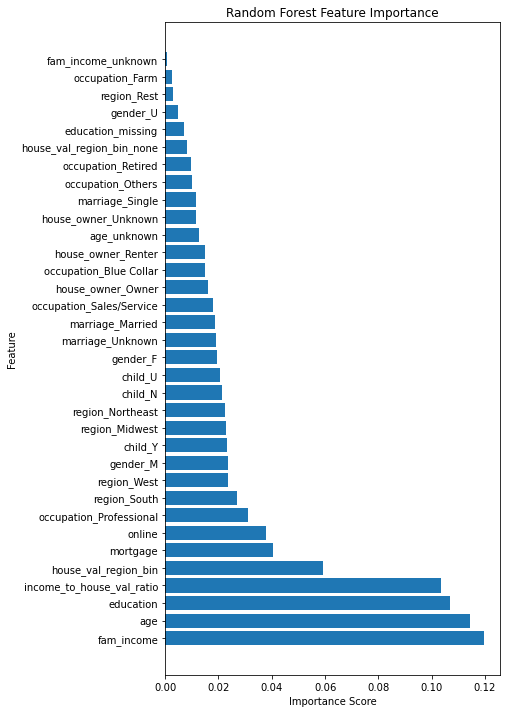

In [ ]:
# plot a bar chart of the importance scores
fig, ax = plt.subplots(figsize=(6, 12))

ax.barh(range(len(sorted_feature_importance)), 
        list(sorted_feature_importance.values()), 
        align='center')

ax.set_yticks(range(len(sorted_feature_importance)))
ax.set_yticklabels(list(sorted_feature_importance.keys()))
ax.set_xlabel('Importance Score')
ax.set_ylabel('Feature')
ax.set_title('Random Forest Feature Importance')

plt.show()

####  3.2.3. Gradient Boosting

Optimize the hyperparameters of the gradient boosting model (learning rate represetns a step size to update the weights)

In [ ]:
# create the gradient boosting classifier object
gb_model = GradientBoostingClassifier()

# define the dictionary of hyperparameters for tuning
gb_param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None]
}

# create and fit an object for hyperparameter tuning
gb_grid_search = GridSearchCV(gb_model,
                              param_grid=gb_param_grid, 
                              cv=KFold(n_splits=10), 
                              scoring='roc_auc',
                              n_jobs=4).fit(X, y)

# print out the best parameters and the corresponding AUC
print("Best parameters:", gb_grid_search.best_params_)
print("AUC:", gb_grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150}
AUC: 0.7644816548797115


In [ ]:
# retrieve the best hyperparameters obtained from the grid search
gb_best_params = gb_grid_search.best_params_

# create a gradient boosting classifier passing the hyperparameters
gb_model = GradientBoostingClassifier(
    learning_rate=gb_best_params['learning_rate'],
    n_estimators=gb_best_params['n_estimators'],
    max_depth=gb_best_params['max_depth'],
    max_features=gb_best_params['max_features']
)

# create a cross validation object
cv = KFold(n_splits=10)

# create an empty array to store the predicted probabilities 
# for each test sample
gb_probs = np.empty((y.shape[0], 2))

# loop over each fold of the data
for train_index, test_index in cv.split(X):
    # get the training and test data for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # fit the model
    gb_model.fit(X_train, y_train)

    # predict the probabilites and write them to an array
    gb_probs[test_index] = gb_model.predict_proba(X_test)

# add the column with predicted probabilities to a data frame
prediction_results = pd.concat([
    prediction_results, 
    pd.DataFrame(gb_probs).iloc[:,1].rename('gradient_boosting')
], axis=1)

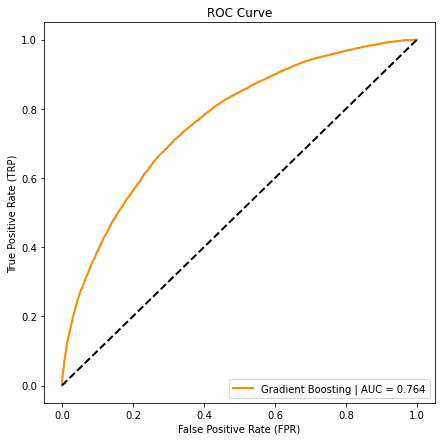

In [ ]:
# calculate the true positive rate and false positive rate 
# using true response values and predictions by the Gradient Boosting model
gb_fpr, gb_tpr, gb_thresholds = roc_curve(prediction_results.loc[:, 'response_true'], 
                                          prediction_results.loc[:, 'gradient_boosting'])
# calculate the area under the ROC curve
gb_roc_auc = auc(gb_fpr, gb_tpr)

# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )
# plot the ROC curve (label shows AUC value)
plt.plot(gb_fpr, gb_tpr, 
         color='darkorange',
         lw=2, 
         label='Gradient Boosting | AUC = %0.3f' % gb_roc_auc)
# plot the baseline of a random classifier
plt.plot([0, 1], [0, 1], 
         color='black', 
         lw=2, 
         linestyle='--')
# add plot and axis labels
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TRP)')
plt.title('ROC Curve')
# add a legend in a lower right corner
plt.legend(loc="lower right")
# show a plot
plt.show()

In [ ]:
# generate a confusion matrix using sklearn passing columns from a results table
gb_cm = confusion_matrix(prediction_results.loc[:, 'response_true'], 
                         np.round(prediction_results.loc[:, 'gradient_boosting']))
# print out the matrix
print('Confusion matrix')
print(' ')
print(gb_cm)
print('------')

# calculate performance metrics
gb_report = classification_report(prediction_results.loc[:, 'response_true'], 
                                  np.round(prediction_results.loc[:, 'gradient_boosting']))
# print out the metrics
print('Classification report')
print(' ')
print(gb_report)

Confusion matrix
 
[[13758  6242]
 [ 5921 14079]]
------
Classification report
 
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     20000
           1       0.69      0.70      0.70     20000

    accuracy                           0.70     40000
   macro avg       0.70      0.70      0.70     40000
weighted avg       0.70      0.70      0.70     40000



#### 3.4. Naive Bayes

Naive Bayes doesn't require the hyperparameter optimization, so fitting the model straight away

In [ ]:
# create a Naive Bayes classifier object
nb_model = GaussianNB()

# create a cross validation object
cv = KFold(n_splits=10)

# create an empty array to store the predicted probabilities 
# for each test sample
nb_probs = np.empty((y.shape[0], 2))

# loop over each fold of the data
for train_index, test_index in cv.split(X):
    # get the training and test data for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # fit the model
    nb_model.fit(X_train, y_train)

    # predict the probabilites and write them to an array
    nb_probs[test_index] = nb_model.predict_proba(X_test)

# add the column with predicted probabilities to a data frame
prediction_results = pd.concat([
    prediction_results, 
    pd.DataFrame(nb_probs).iloc[:,1].rename('naive_bayes')
], axis=1)

# print out the resulting prediction results
print(prediction_results)

       response_true  logistic_regression  decision_tree  random_forest  \
0                  0             0.258985       0.217687       0.320630   
1                  1             0.502706       0.600668       0.533302   
2                  1             0.643262       0.591777       0.550174   
3                  1             0.232170       0.157175       0.284702   
4                  0             0.557133       0.395797       0.483401   
...              ...                  ...            ...            ...   
39995              0             0.400405       0.237500       0.380438   
39996              1             0.721834       0.980952       0.582761   
39997              1             0.739901       0.724080       0.614227   
39998              0             0.434601       0.380573       0.390696   
39999              1             0.349048       0.540541       0.470711   

       gradient_boosting  naive_bayes  
0               0.188214     0.003983  
1               0.3

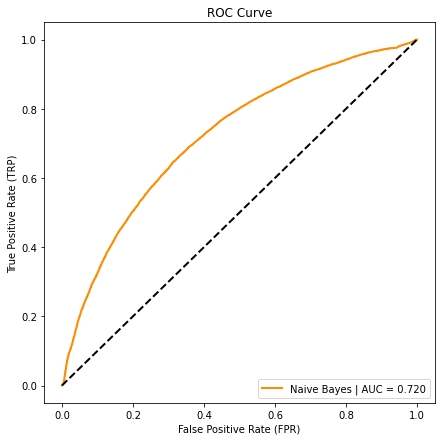

In [ ]:
# calculate the true positive rate and false positive rate 
# using true response values and predictions by the Gradient Boosting model
nb_fpr, nb_tpr, nb_thresholds = roc_curve(prediction_results.loc[:, 'response_true'], 
                                          prediction_results.loc[:, 'naive_bayes'])
# calculate the area under the ROC curve
nb_roc_auc = auc(nb_fpr, nb_tpr)

# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )
# plot the ROC curve (label shows AUC value)
plt.plot(nb_fpr, nb_tpr, 
         color='darkorange',
         lw=2, 
         label='Naive Bayes | AUC = %0.3f' % nb_roc_auc)
# plot the baseline of a random classifier
plt.plot([0, 1], [0, 1], 
         color='black', 
         lw=2, 
         linestyle='--')
# add plot and axis labels
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TRP)')
plt.title('ROC Curve')
# add a legend in a lower right corner
plt.legend(loc="lower right")
# show a plot
plt.show()

In [ ]:
# generate a confusion matrix using sklearn passing columns from a results table
nb_cm = confusion_matrix(prediction_results.loc[:, 'response_true'], 
                         np.round(prediction_results.loc[:, 'naive_bayes']))
# print out the matrix
print('Confusion matrix')
print(' ')
print(nb_cm)
print('------')

# calculate performance metrics
nb_report = classification_report(prediction_results.loc[:, 'response_true'], 
                                  np.round(prediction_results.loc[:, 'naive_bayes']))
# print out the metrics
print('Classification report')
print(' ')
print(nb_report)

Confusion matrix
 
[[12461  7539]
 [ 5900 14100]]
------
Classification report
 
              precision    recall  f1-score   support

           0       0.68      0.62      0.65     20000
           1       0.65      0.70      0.68     20000

    accuracy                           0.66     40000
   macro avg       0.67      0.66      0.66     40000
weighted avg       0.67      0.66      0.66     40000



#### 3.5. k-Nearest Neighbors (kNN) classifier

Optimizing the hyperparameters of the kNN classifier (number of nearest neighbors to include, weight function to use, use Manhattan or Euclidean distance)

In [ ]:
# create the kNN classifier object
knn_model = KNeighborsClassifier()

# define the dictionary of hyperparameters for tuning
knn_param_grid = {
    'n_neighbors': [100, 200, 400, 600],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# create and fit an object for hyperparameter tuning
knn_grid_search = GridSearchCV(knn_model,
                              param_grid=knn_param_grid, 
                              cv=KFold(n_splits=10), 
                              scoring='roc_auc',
                              n_jobs=4,
                              verbose=1).fit(X, y)

# print out the best parameters and the corresponding AUC
print("Best parameters:", knn_grid_search.best_params_)
print("AUC:", knn_grid_search.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best parameters: {'n_neighbors': 200, 'p': 1, 'weights': 'uniform'}
AUC: 0.7524044055047194


In [ ]:
# retrieve the best hyperparameters obtained from the grid search
knn_best_params = knn_grid_search.best_params_

# create a kNN classifier passing the hyperparameters
knn_model = KNeighborsClassifier(
    n_neighbors=knn_best_params['n_neighbors'],
    weights=knn_best_params['weights'],
    p=knn_best_params['p']
)

# create a cross validation object
cv = KFold(n_splits=10)

# create an empty array to store the predicted probabilities 
# for each test sample
knn_probs = np.empty((y.shape[0], 2))

# loop over each fold of the data
for train_index, test_index in cv.split(X):
    # get the training and test data for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # fit the model
    knn_model.fit(X_train, y_train)

    # predict the probabilites and write them to an array
    knn_probs[test_index] = knn_model.predict_proba(X_test)

# add the column with predicted probabilities to a data frame
prediction_results = pd.concat([
    prediction_results, 
    pd.DataFrame(knn_probs).iloc[:,1].rename('knn')
], axis=1)

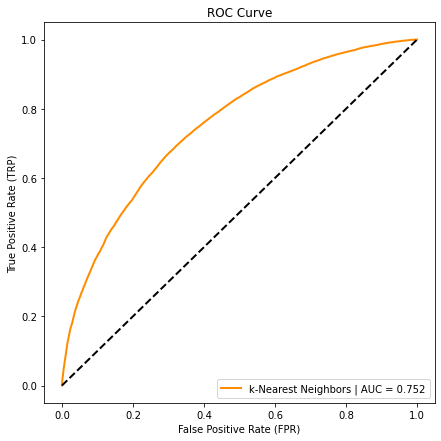

In [ ]:
# calculate the true positive rate and false positive rate 
# using true response values and predictions by the Gradient Boosting model
knn_fpr, knn_tpr, knn_thresholds = roc_curve(prediction_results.loc[:, 'response_true'], 
                                          prediction_results.loc[:, 'knn'])
# calculate the area under the ROC curve
knn_roc_auc = auc(knn_fpr, knn_tpr)

# create a 7 by 7 plot canvas
plt.figure( figsize=(7, 7) )
# plot the ROC curve (label shows AUC value)
plt.plot(knn_fpr, knn_tpr, 
         color='darkorange',
         lw=2, 
         label='k-Nearest Neighbors | AUC = %0.3f' % knn_roc_auc)
# plot the baseline of a random classifier
plt.plot([0, 1], [0, 1], 
         color='black', 
         lw=2, 
         linestyle='--')
# add plot and axis labels
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TRP)')
plt.title('ROC Curve')
# add a legend in a lower right corner
plt.legend(loc="lower right")
# show a plot
plt.show()

#### 3.6. ROC-AUC plot for all the models

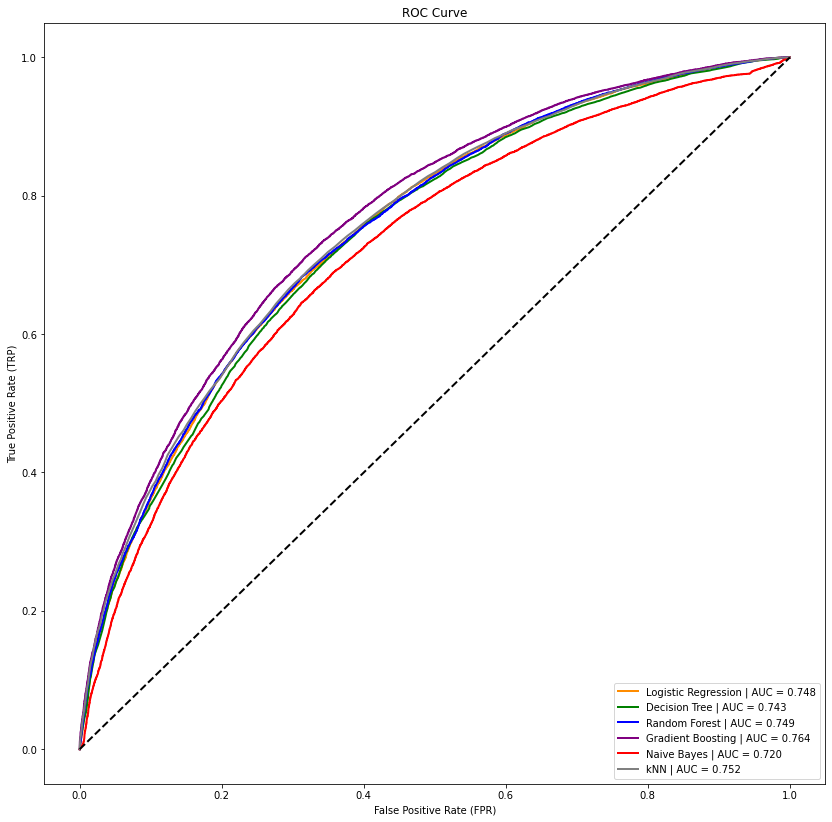

In [ ]:
# create a 14 by 14 plot canvas
plt.figure( figsize=(14, 14) )

# logistic regression model
plt.plot(logreg_fpr, logreg_tpr, 
         color='darkorange',
         lw=2, 
         label='Logistic Regression | AUC = %0.3f' % logreg_roc_auc)
# decision tree model
plt.plot(dt_fpr, dt_tpr, 
         color='green',
         lw=2, 
         label='Decision Tree | AUC = %0.3f' % dt_roc_auc)
# random forest model
plt.plot(rf_fpr, rf_tpr, 
         color='blue',
         lw=2, 
         label='Random Forest | AUC = %0.3f' % rf_roc_auc)
# gradient boosting model
plt.plot(gb_fpr, gb_tpr, 
         color='purple',
         lw=2, 
         label='Gradient Boosting | AUC = %0.3f' % gb_roc_auc)
# naive bayes model
plt.plot(nb_fpr, nb_tpr, 
         color='red',
         lw=2, 
         label='Naive Bayes | AUC = %0.3f' % nb_roc_auc)
# k-nearest neighbor model
plt.plot(knn_fpr, knn_tpr, 
         color='gray',
         lw=2, 
         label='kNN | AUC = %0.3f' % knn_roc_auc)
# baseline of a random classifier
plt.plot([0, 1], [0, 1], 
         color='black', 
         lw=2, 
         linestyle='--')

# add plot and axis labels
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TRP)')
plt.title('ROC Curve')
# add a legend in a lower right corner
plt.legend(loc="lower right")
# show a plot
plt.show()